In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [2]:
    directory = './datasets/Russia Site/cleaned/'
    files = [file for file in os.listdir(directory) if file.endswith('.csv')]



    stocks = {}
    for file in files:
        df = pd.read_csv(directory + file)
        df['date_time'] = pd.to_datetime(df['date_time'], 
                                         format='%Y-%m-%d %H:%M:%S')
        df.set_index('date_time', inplace=True)
        df.index = pd.DatetimeIndex(df.index).to_period('ms')
        df.sort_index(inplace=True)
        ticker = df['ticker'][0]
        stocks[ticker] = df
    #     print(f'loaded {ticker} from {file}')
    #     print(f'rows {df.shape[0]} imported')




In [3]:
# Split into train/test
def ttt(df):
    return train_test_split(df['price'],
                           test_size = .2,
                           shuffle=False)

In [10]:
# Model + fit
def model_it(df):
    res_list = []
    company = df['ticker'][0]
    df = df.resample('s').mean()
    y_train, y_test = ttt(df)
#     for q in range(5):
    q = 0
    for lags in [30]:
        print(f'fitting arima on {company} with lags = {lags}, q={q}')
        try:
            arima = ARIMA(endog=y_train.astype(float).dropna(),
                         order = (lags, 0, q))
            model = arima.fit()
            preds = arima.predict(params = model.params,
                                 start = y_test.index[0],
                                 end = y_test.index[-1])
            results = {
                'company' : company,
                'q' : q,
                'lags' : lags,
                'aic' : model.aic,
                'model' : model,
                'preds' : preds}
            # Plot data.
            plt.figure(figsize=(10,6))

            # Plot training data.
            plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

            # Plot testing data.
            plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

            # Plot predicted test values.
            plt.plot(y_test.index, preds, color = 'green')

            plt.title(label = f'Simple 30 lag model of stock price for {company}', fontsize=16)
#             plt.savefig(f'./charts/simple30lagarimas/{company}.png', bbox_inches='tight')
#             plt.savefig(f'./charts/simple30lagarimas/{company}t.png', transparent=True)
            plt.show()
        except: 
            print('failed model')
            pass
    res_list.append(results)
    print(f'*******finished modeling {company}**********')
#     return res_list
    
    

In [12]:
# loop em all
all_results = []
count = 0
for k, company in stocks.items():
    res = model_it(company)
    all_results += res
    count += 1
    print(f'{count}/{len(stocks.items())}')
full_results = pd.DataFrame(all_results)

fitting arima on csco with lags = 1, q=0
fitting arima on csco with lags = 2, q=0
fitting arima on csco with lags = 3, q=0
fitting arima on csco with lags = 5, q=0
fitting arima on csco with lags = 10, q=0
fitting arima on csco with lags = 15, q=0
fitting arima on csco with lags = 30, q=0
*******finished modeling csco**********
fitting arima on ba with lags = 1, q=0
fitting arima on ba with lags = 2, q=0
fitting arima on ba with lags = 3, q=0
fitting arima on ba with lags = 5, q=0
fitting arima on ba with lags = 10, q=0
fitting arima on ba with lags = 15, q=0
fitting arima on ba with lags = 30, q=0
*******finished modeling ba**********
fitting arima on v with lags = 1, q=0
fitting arima on v with lags = 2, q=0
fitting arima on v with lags = 3, q=0
fitting arima on v with lags = 5, q=0
fitting arima on v with lags = 10, q=0
fitting arima on v with lags = 15, q=0
fitting arima on v with lags = 30, q=0
*******finished modeling v**********
fitting arima on wba with lags = 1, q=0
fitting ar

/Users/jsf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


fitting arima on intc with lags = 5, q=0
fitting arima on intc with lags = 10, q=0
fitting arima on intc with lags = 15, q=0
fitting arima on intc with lags = 30, q=0
*******finished modeling intc**********
fitting arima on mmm with lags = 1, q=0
fitting arima on mmm with lags = 2, q=0
fitting arima on mmm with lags = 3, q=0
fitting arima on mmm with lags = 5, q=0
fitting arima on mmm with lags = 10, q=0
fitting arima on mmm with lags = 15, q=0
fitting arima on mmm with lags = 30, q=0
*******finished modeling mmm**********
fitting arima on ko with lags = 1, q=0
fitting arima on ko with lags = 2, q=0
fitting arima on ko with lags = 3, q=0
fitting arima on ko with lags = 5, q=0
fitting arima on ko with lags = 10, q=0
fitting arima on ko with lags = 15, q=0
fitting arima on ko with lags = 30, q=0
*******finished modeling ko**********
fitting arima on msft with lags = 1, q=0
fitting arima on msft with lags = 2, q=0
fitting arima on msft with lags = 3, q=0
fitting arima on msft with lags = 

fitting arima on csco with lags = 30, q=0
failed model
*******finished modeling csco**********


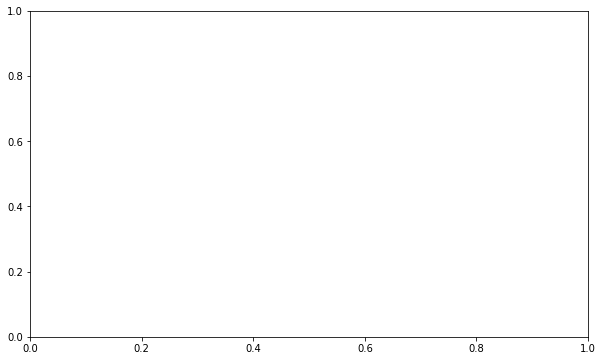

In [11]:
model_it(stocks['csco']) # .iloc[:1000]

In [12]:
df = stocks['csco']
company = df['ticker'][0]
df = df.resample('s').mean()
df.head()

,date,time,price,vol
date_time,,,,
2019-09-03 09:30:00,20190903.0,93000.0,46.560,100.0
2019-09-03 09:30:01,20190903.0,93001.0,46.590,137.5
2019-09-03 09:30:02,20190903.0,93002.0,46.600,100.0
2019-09-03 09:30:03,NaN,NaN,NaN,NaN
2019-09-03 09:30:04,20190903.0,93004.0,46.622,120.0


In [16]:
df['price'].fillna(method='ffill', inplace=True)
df['vol'].fillna(0, inplace=True)
df.head()

,date,time,price,vol
date_time,,,,
2019-09-03 09:30:00,20190903.0,93000.0,46.560,100.0
2019-09-03 09:30:01,20190903.0,93001.0,46.590,137.5
2019-09-03 09:30:02,20190903.0,93002.0,46.600,100.0
2019-09-03 09:30:03,NaN,NaN,46.600,0.0
2019-09-03 09:30:04,20190903.0,93004.0,46.622,120.0


In [17]:
y_train, y_test = ttt(df)

In [18]:
y_train.head()

date_time
2019-09-03 09:30:00    46.560
2019-09-03 09:30:01    46.590
2019-09-03 09:30:02    46.600
2019-09-03 09:30:03    46.600
2019-09-03 09:30:04    46.622
Freq: S, Name: price, dtype: float64

In [21]:
arima = ARIMA(endog=y_train.astype(float).dropna(),
                     order = (30, 1, 0))
model = arima.fit()
preds = arima.predict(params = model.params,
                             start = y_test.index[0],
                             end = y_test.index[-1])

In [26]:
arima.predict(model.params, y_test.index[0], y_test.index[-1])

array([-3.15958970e-07, -3.25056847e-07, -3.27372954e-07, ...,
       -3.33383060e-07, -3.33383060e-07, -3.33383060e-07])

In [ ]:
y_train

In [ ]:

#     for q in range(5):
q = 0
for lags in [30]:
    print(f'fitting arima on {company} with lags = {lags}, q={q}')
    try:
        
        results = {
            'company' : company,
            'q' : q,
            'lags' : lags,
            'aic' : model.aic,
            'model' : model,
            'preds' : preds}
        # Plot data.
        plt.figure(figsize=(10,6))

        # Plot training data.
        plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

        # Plot testing data.
        plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

        # Plot predicted test values.
        plt.plot(y_test.index, preds, color = 'green')

        plt.title(label = f'Simple 30 lag model of stock price for {company}', fontsize=16)
#             plt.savefig(f'./charts/simple30lagarimas/{company}.png', bbox_inches='tight')
#             plt.savefig(f'./charts/simple30lagarimas/{company}t.png', transparent=True)
        plt.show()
    except: 
        print('failed model')
        pass
res_list.append(results)
print(f'*******finished modeling {company}**********')
#     return res_list



In [27]:
from statsmodels.tsa.stattools import adfuller

In [29]:
adfuller(df['price'])

KeyboardInterrupt: 

In [15]:
full_results.sort_values('aic')

,company,q,lags,aic,model,preds
12,msft,0,30,-1.206707e+06,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[0.0012009086824188435, 0.0014923228850671063,..."
25,aapl,0,30,-1.112568e+06,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[0.002575779797457081, 0.0007452726213933896, ..."
9,intc,0,30,-1.019442e+06,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[0.0004663402581300024, 0.00021038428713616905..."
0,csco,0,30,-8.986628e+05,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[-0.00027592802587389807, 0.000149669108919975..."
21,jpm,0,30,-8.632233e+05,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[-0.00012218593431097654, 0.000163485397461187..."
23,vz,0,30,-6.376779e+05,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[-0.0008938179260648411, -0.000153901262693518..."
22,pfe,0,30,-6.278349e+05,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[0.0007678323532161447, -0.0001380564290163186..."
11,ko,0,30,-5.973867e+05,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[0.0002118395719599883, -0.0001827549810574971..."
15,xom,0,30,-5.904525e+05,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[-0.0007135939433628282, -6.772671220402997e-0..."
20,dis,0,30,-5.816522e+05,<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[0.0019544715570581866, 0.00027947245670818826..."


In [17]:
full_results.to_csv('./models/quickarima.csv', index=False)

In [7]:
df = pd.read_csv(directory + files[0])
df.head()

df['date_time'] = pd.to_datetime(df['date_time'], 
                                     format='%Y-%m-%d %H:%M:%S')
df.head()
df.set_index('date_time', inplace=True)

df.index = pd.DatetimeIndex(df.index).to_period('ms')
df.head()

df.index